# Use perspective transformat to get birdseye view of the track

This notebook shows how to take an undistorted image from the camera of a [donkey car](http://donkeycar.com) and transform its perspective so its like your looking straight down on the track. 

In [2]:
from base import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
def get_birdseye_functions(src, dst, img_size):
    
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)

    def birdseye(img):
        return cv2.warpPerspective(img, M, dsize=img_size, flags=cv2.INTER_LINEAR)

    def unbirdseye(img):
        return cv2.warpPerspective(img, Minv, img_size, flags=cv2.INTER_LINEAR)
    
    return birdseye, unbirdseye


def get_distort_functions(K, D, R):
    
    def undistort(img):
        return cv_util.undistort(img, K, D, R=R)
    
    return undistort

In [4]:
undistort = get_distort_functions(default.camera_K, default.camera_D, default.camera_R)

In [5]:
img = plt.imread('/home/wroscoe/calib/camera_calib_raw_2/632_cam-image_array_.jpg')

img = cv2.resize(img, (160, 120))
img_undistorted = undistort(img)

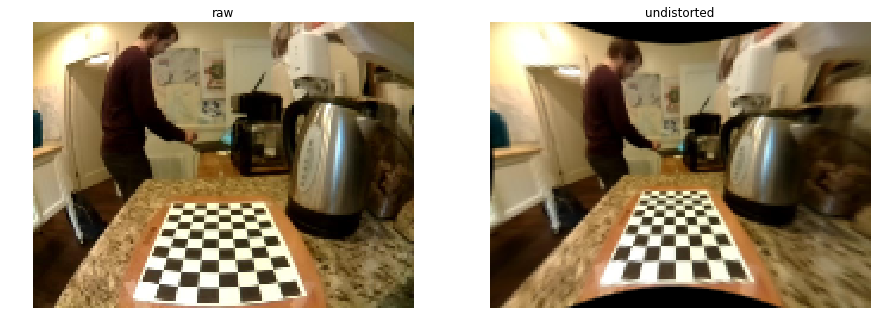

In [6]:

imgs = [{'name': 'raw', 'array': img},
        {'name':'undistorted', 'array': img_undistorted}]

show_imgs(imgs)

In [7]:

src_pts = np.array([[45,109],[63,70],[91,70],[112,109]], np.float32)

half_w = int(15/2)
half_h = int(half_w * 9/7)
center_x, center_y = (80, 100)

dst_pts = np.array([[center_x - half_w, center_y + half_h],
                    [center_x - half_w, center_y - half_h],
                    [center_x + half_w, center_y - half_h],
                    [center_x + half_w, center_y + half_h]], np.float32)

scr_poly = src_pts.reshape((-1,1,2)).astype(np.int)
img_undistorted = cv2.polylines(img_undistorted,[scr_poly],True,(0,255,255))

In [8]:
birdseye, unbirdseye = get_birdseye_functions(src_pts, dst_pts, (img.shape[1], img.shape[0]))
img_birdseye = birdseye(img_undistorted)

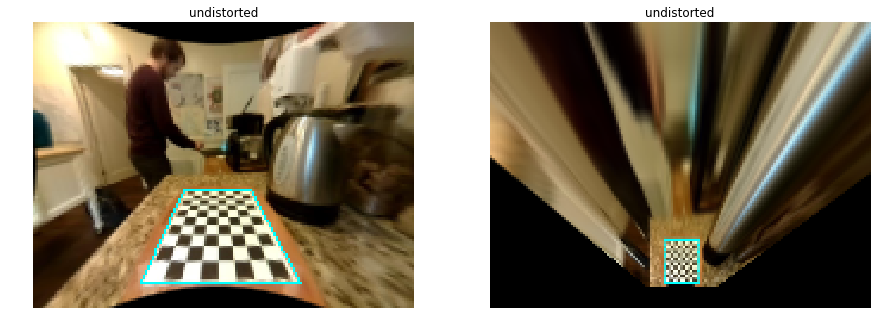

In [9]:
imgs = [{'name':'undistorted', 'array': img_undistorted},
        {'name':'undistorted', 'array': img_birdseye}
       ]
show_imgs(imgs)

In [10]:
img = plt.imread('/home/wroscoe/data/awells_pipesupply_centerline/1000_cam-image_array_.jpg')

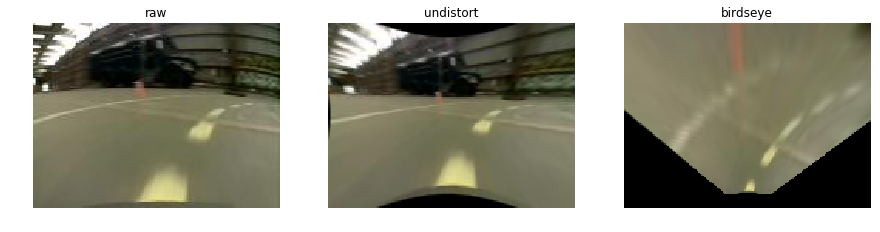

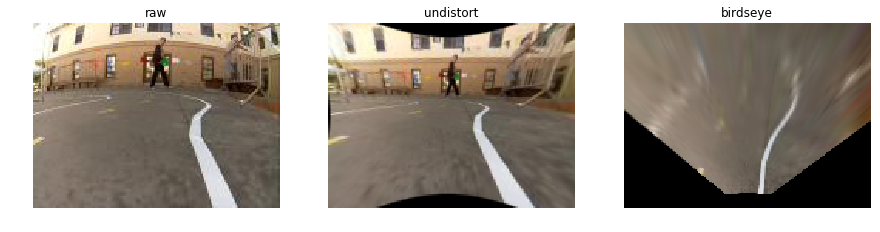

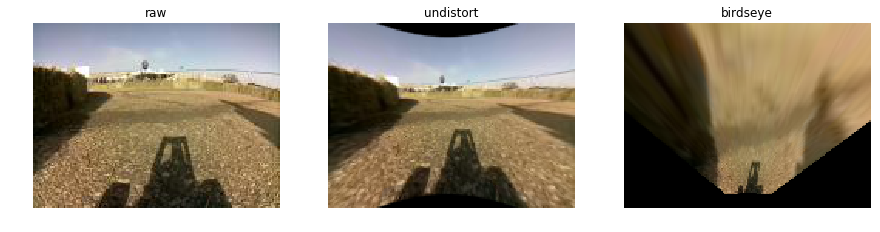

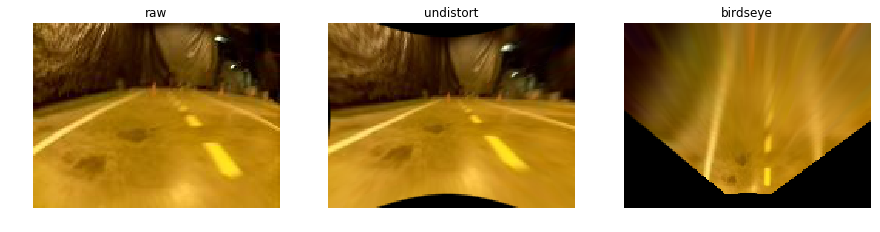

In [16]:

img_wh = plt.imread('/home/wroscoe/data/awells_pipesupply_centerline/1000_cam-image_array_.jpg')
img_mf = plt.imread('/home/wroscoe/data/wroscoe_oakmakerfaire_rightlane3/1006_cam-image_array_.jpg')
img_avc = plt.imread('/home/wroscoe/data/wroscoe_avc_raceline2/10055_cam-image_array_.jpg')
img_hive = plt.imread('/home/wroscoe/data/tkramer_hive_cone_avoid2/1002_cam-image_array_.jpg')

for img in [img_wh, img_mf, img_avc, img_hive]:
    img_undistorted = undistort(img)
    img_birdseye = birdseye(img_undistorted)
    show_imgs([
        {'name': 'raw', 'array': img},
        {'name': 'undistort', 'array': img_undistorted},
        {'name': 'birdseye', 'array': img_birdseye}
    ])

